# Name: Kapil Yadav
### Roll No: B22AI024
### Lab-1

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from math import pi

# Story 1: Exploring the Trends: Visualizing Titanic Passenger Data

In [3]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Task 1: Survival Rate by Passenger Class

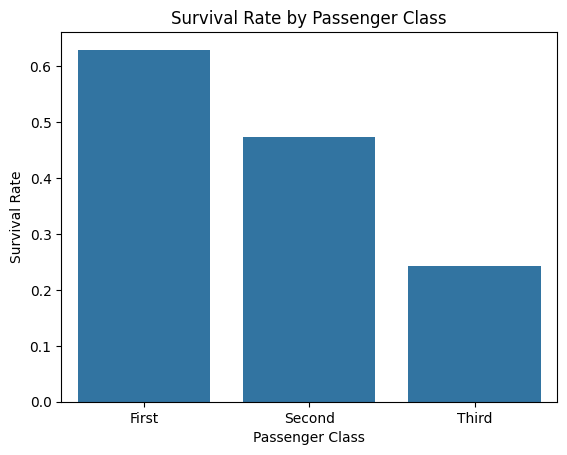

In [4]:
# Bar chart for survival rate by passenger class
sns.barplot(x='class', y='survived', data=df, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

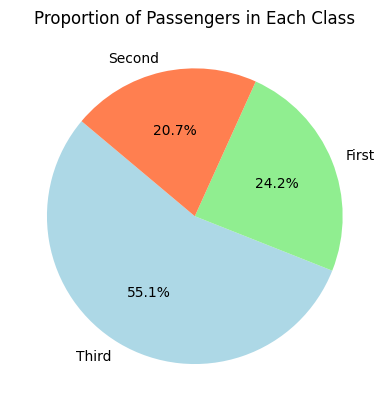

In [5]:
# Pie chart for proportion of passengers in each class
df['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'coral'])
plt.title('Proportion of Passengers in Each Class')
plt.ylabel('')  # Remove the y-axis label for clarity
plt.show()


### Why? Swarm plots give a detailed distribution of survival outcomes by passenger class and include additional dimensions like gender. This visualization is useful for analyzing individual data points while retaining a sense of the categorical relationship.

/home/ykapil897/mypython/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ykapil897/mypython/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ykapil897/mypython/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 89.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ykapil897/mypython/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ykapil897/mypython/lib/python3.12/site-packages/seabor

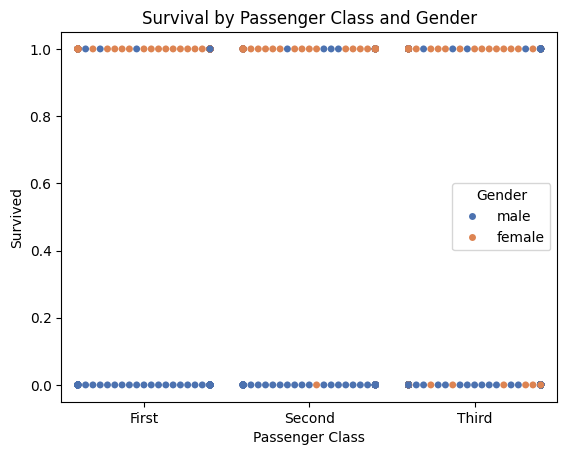

In [6]:
# Swarm plot for survival by passenger class
sns.swarmplot(x='class', y='survived', data=df, hue='sex', palette='deep')
plt.title('Survival by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survived')
plt.legend(title='Gender')
plt.show()


### Task 2: Gender and Survival Analysis

/tmp/ipykernel_6854/4023375291.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='survived', index='class', columns='sex', aggfunc='mean')


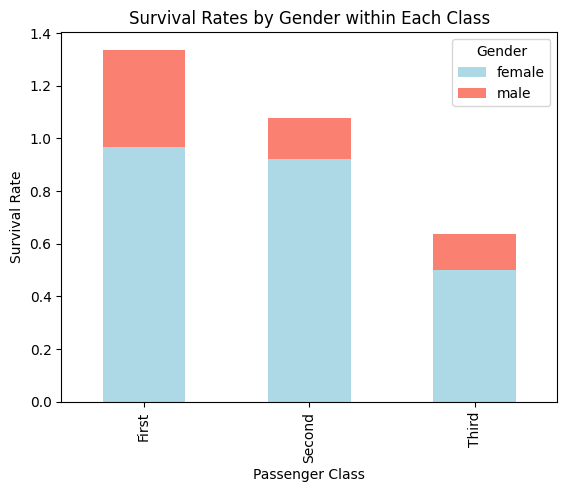

In [7]:
# Create a pivot table for survival by class and gender
pivot_table = df.pivot_table(values='survived', index='class', columns='sex', aggfunc='mean')

# Stacked bar chart
pivot_table.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Survival Rates by Gender within Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()

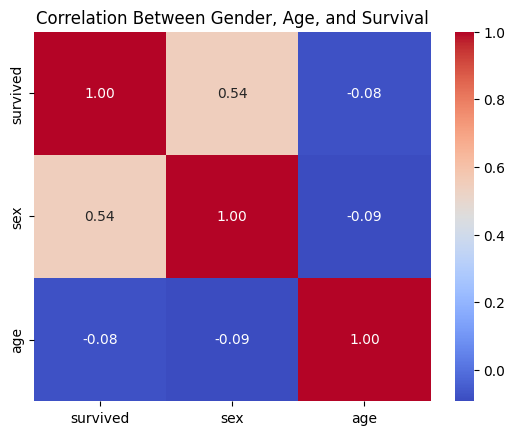

In [8]:
# Create a correlation heatmap using age, gender (encoded), and survival
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 0, 'female': 1})  # Encode gender

# Select relevant columns for correlation
corr_data = df_encoded[['survived', 'sex', 'age']].corr()

# Generate heatmap
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Gender, Age, and Survival')
plt.show()


### Why? Grouped bar charts make it easier to compare survival rates between genders within each class individually, rather than stacking categories.

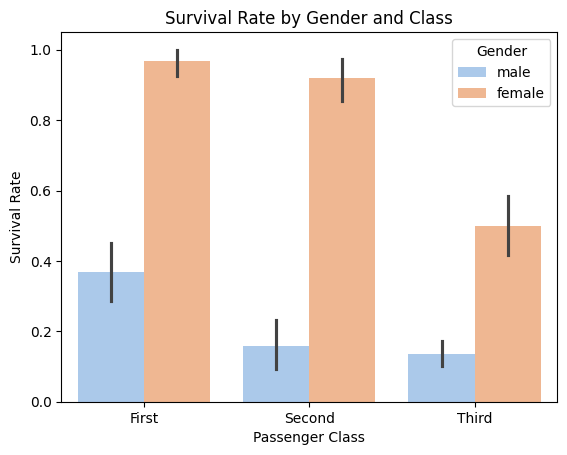

In [9]:
# Grouped bar chart for survival rate by gender and class
sns.barplot(x='class', y='survived', hue='sex', data=df, palette='pastel')
plt.title('Survival Rate by Gender and Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()


### Task 3: Port of Embarkation Analysis

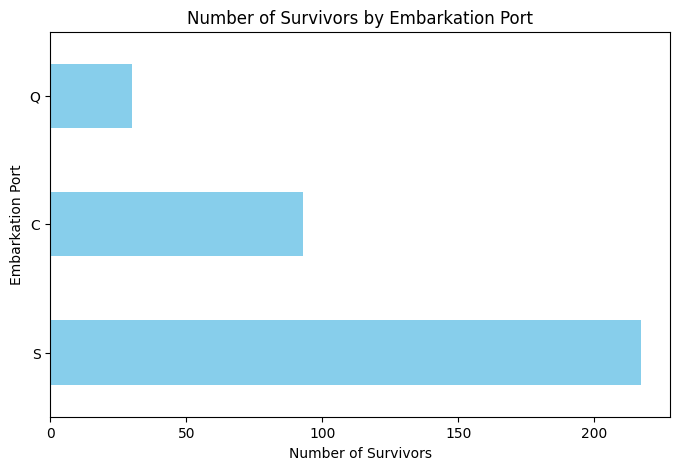

In [10]:
# Assume 'titanic_data' is a DataFrame containing the Titanic dataset
port_survival = df[df['survived'] == 1]['embarked'].value_counts()

plt.figure(figsize=(8, 5))
port_survival.plot(kind='barh', color='skyblue')
plt.title('Number of Survivors by Embarkation Port')
plt.xlabel('Number of Survivors')
plt.ylabel('Embarkation Port')
plt.show()

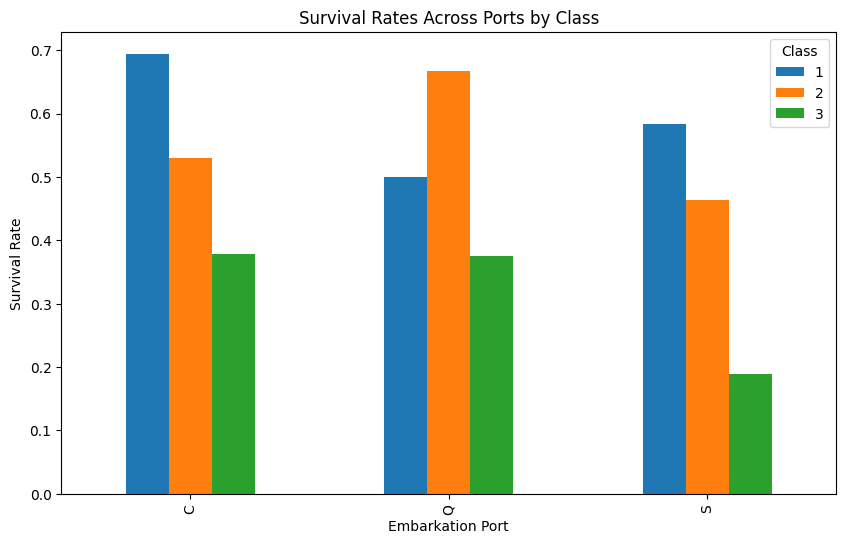

In [11]:
class_port_survival = df.groupby(['embarked', 'pclass'])['survived'].mean().unstack()

class_port_survival.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Rates Across Ports by Class')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.legend(title='Class')
plt.show()


### Why: A stacked bar chart provides an additional view of the distribution of survivors' classes within each port, emphasizing the relative contributions of classes.

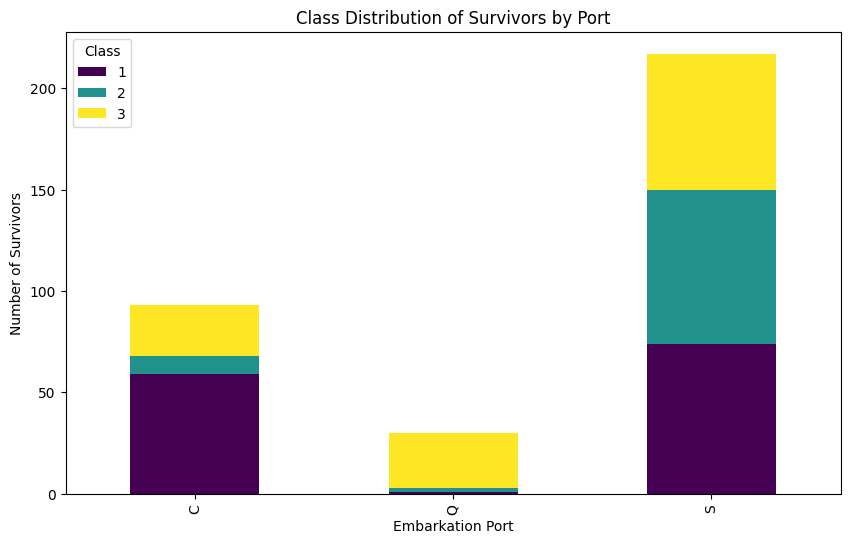

In [12]:
class_distribution = df[df['survived'] == 1].groupby(['embarked', 'pclass']).size().unstack()

class_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Class Distribution of Survivors by Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Survivors')
plt.legend(title='Class')
plt.show()


### Task 4: Age Distribution Analysis

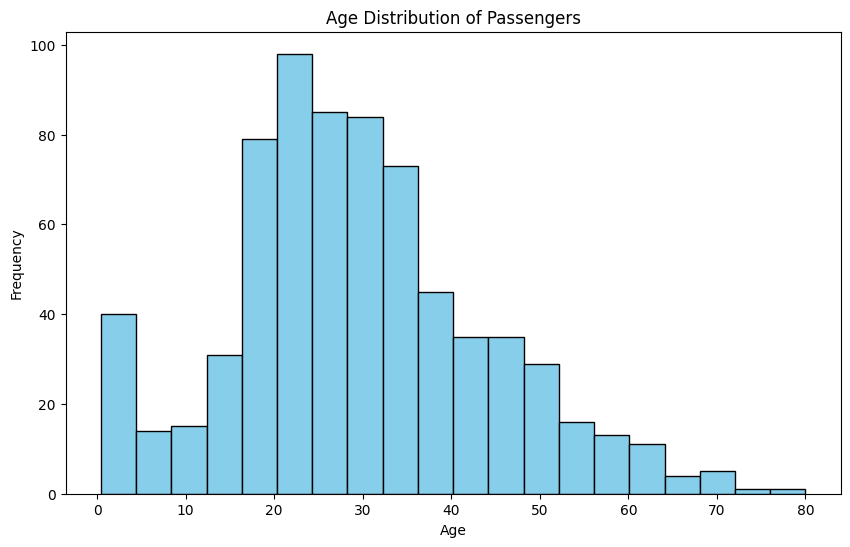

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_6854/756179363.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby(age_bins)['survived'].mean()


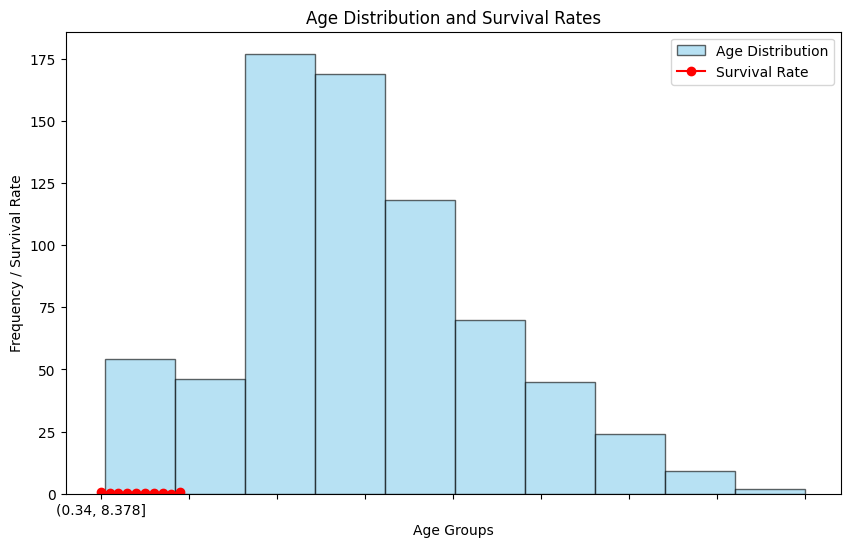

In [14]:
age_bins = pd.cut(df['age'], bins=10)
survival_rates = df.groupby(age_bins)['survived'].mean()

plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=10, color='skyblue', edgecolor='black', alpha=0.6, label='Age Distribution')
survival_rates.plot(color='red', marker='o', label='Survival Rate')
plt.title('Age Distribution and Survival Rates')
plt.xlabel('Age Groups')
plt.ylabel('Frequency / Survival Rate')
plt.legend()
plt.show()


### Why: A box plot provides a clear view of age distributions for survivors and non-survivors, showing medians and outliers.

/tmp/ipykernel_6854/1470155838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=df, palette='pastel')


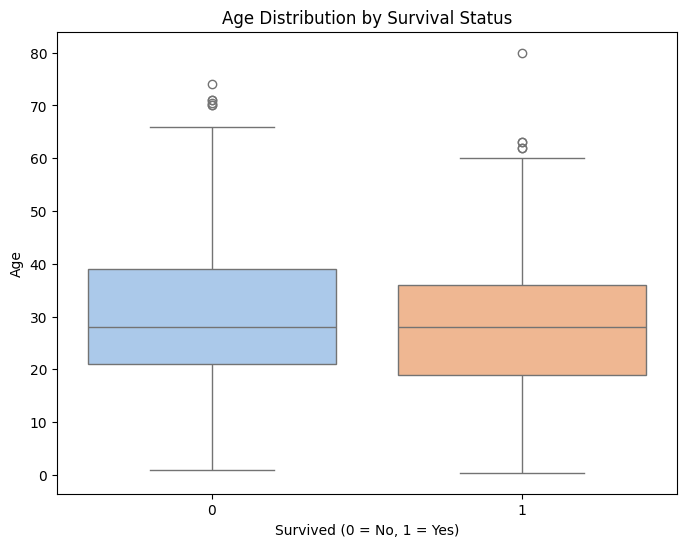

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=df, palette='pastel')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()



### Task 5: Fare and Survival Patterns


/tmp/ipykernel_6854/2297067372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='fare', data=df, palette='coolwarm')


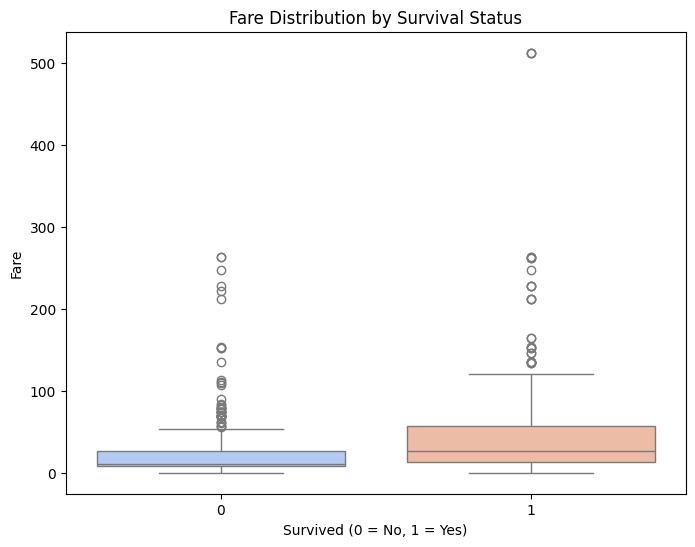

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='fare', data=df, palette='coolwarm')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


/tmp/ipykernel_6854/2557118798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='survived', y='fare', data=df, palette='coolwarm', split=True)


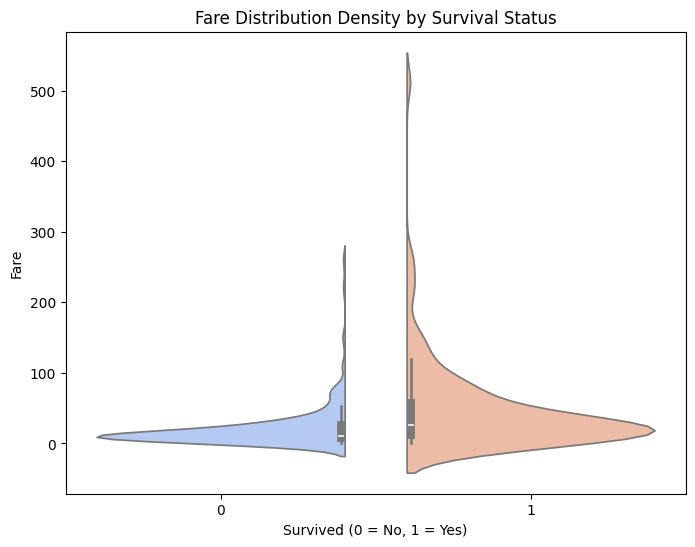

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='survived', y='fare', data=df, palette='coolwarm', split=True)
plt.title('Fare Distribution Density by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


### Why: Strip plots provide an alternative view by showing individual data points, making it easier to observe clusters or outliers.

/tmp/ipykernel_6854/187753273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='survived', y='fare', data=df, palette='coolwarm', jitter=True, alpha=0.7)


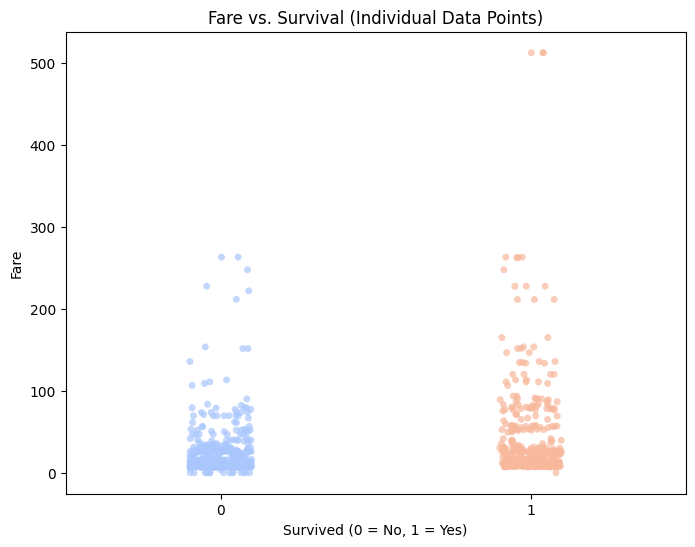

In [18]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='survived', y='fare', data=df, palette='coolwarm', jitter=True, alpha=0.7)
plt.title('Fare vs. Survival (Individual Data Points)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


# Story 2: A Decade of Growth: Tracking Foreign Tourist Arrivals in India 

In [19]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/S2_T1_Tourism_In_India_Statistics_2018-Table_2.1.1_1.csv'
data = pd.read_csv(file_path)

# Convert 'Year' column to integer
data['Year'] = data['Year'].astype(int)

### Task 01: Growth of Foreign Tourist Arrival in India

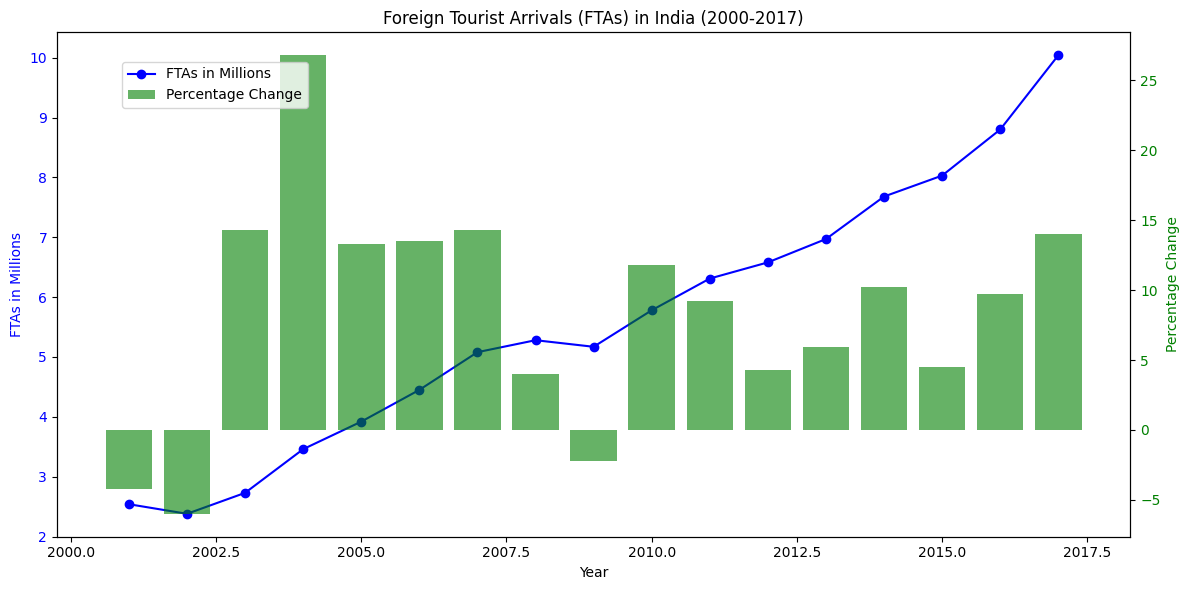

In [20]:
# Filter data for the years 2000 to 2017
data = data[(data['Year'] >= 2000) & (data['Year'] <= 2017)]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line chart for FTAs in millions
ax1.plot(data['Year'], data['FTAs in India (in Million)'], color='b', marker='o', label='FTAs in Millions')
ax1.set_xlabel('Year')
ax1.set_ylabel('FTAs in Millions', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Bar chart for percentage change year-over-year
ax2 = ax1.twinx()
ax2.bar(data['Year'], data['FTAs in India - Percentage change over previous year'], alpha=0.6, color='g', label='Percentage Change')
ax2.set_ylabel('Percentage Change', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and legend
plt.title('Foreign Tourist Arrivals (FTAs) in India (2000-2017)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Show plot
plt.show()

### Task 02: From where they are coming

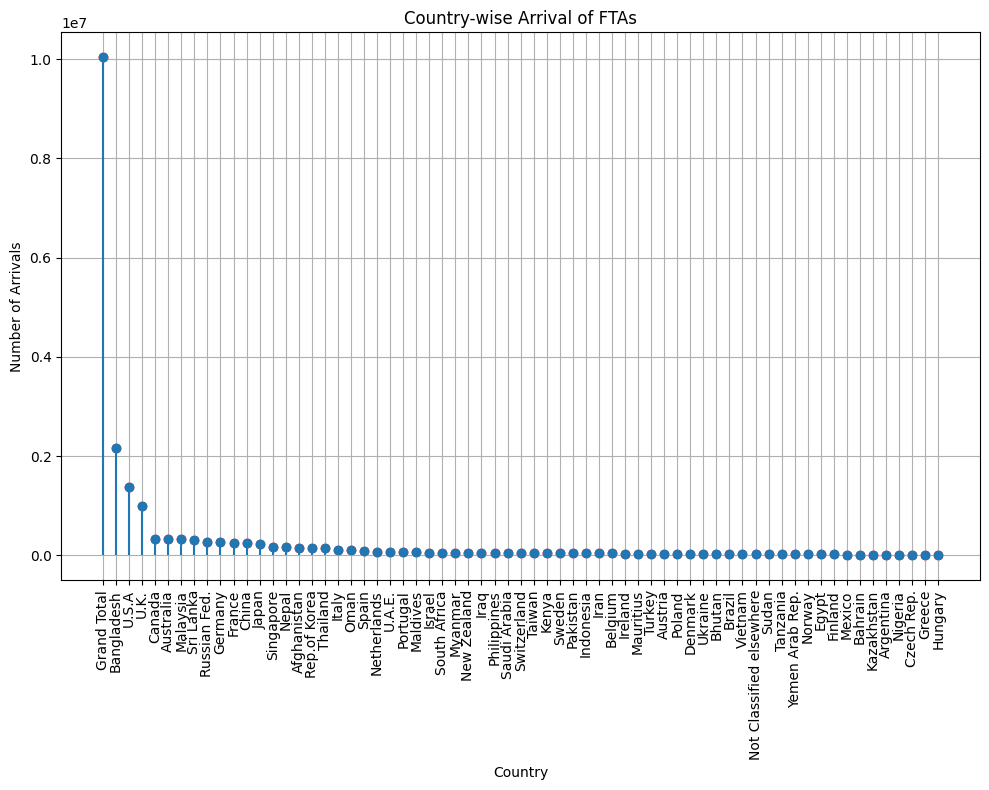

In [21]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/S2_T2_2_Tourism_In_India_Statistics_2018-Table_2.7.2.csv'
data = pd.read_csv(file_path)

# Filter data for countries (country of nationality) and arrivals, excluding rows with 'Total' or 'Others'
countries_data = data[~data['Country of Nationality'].isin(['Total', 'Others'])][['Country of Nationality', 'Arrivals']].drop_duplicates()

# Sort data by number of arrivals
countries_data = countries_data.sort_values(by='Arrivals', ascending=False)

# Plotting lollipop chart
plt.figure(figsize=(10, 8))
plt.stem(countries_data['Country of Nationality'], countries_data['Arrivals'], basefmt=" ")
plt.scatter(countries_data['Country of Nationality'], countries_data['Arrivals'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Arrivals')
plt.title('Country-wise Arrival of FTAs')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/S2_T2_1_Tourism_In_India_Statistics_2018-Table_2.2.1.csv'
data = pd.read_csv(file_path)

# Filter data for the year 2017
data_2017 = data[['Region/Country ', 'Number of Arrivals - 2017']]

# Sort data by number of arrivals
data_2017 = data_2017.sort_values(by='Number of Arrivals - 2017', ascending=False)

# Define nodes and links for Sankey diagram
countries = data_2017['Region/Country '].tolist()
arrivals = data_2017['Number of Arrivals - 2017'].tolist()

# Create labels for nodes
labels = countries + ['Total Arrivals']

# Create source and target indices
source_indices = list(range(len(countries)))
target_indices = [len(countries)] * len(countries)

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=arrivals
    ))])

fig.update_layout(title_text="Country-wise Arrival of FTAs in 2017", font_size=10)
fig.show()

### Task 03: Compositions of FTAs

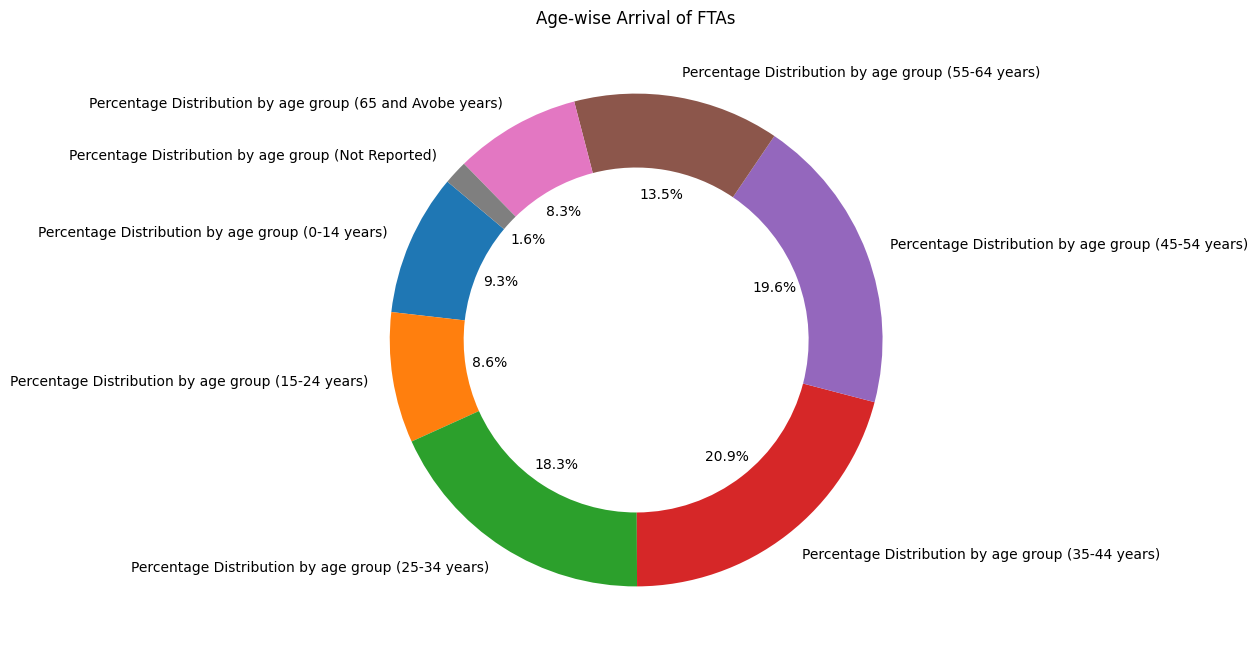

In [23]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/S2_T3_1_Tourism_In_India_Statistics_2018-Table_2.7.1.csv'
data = pd.read_csv(file_path)

# Calculate the total percentage distribution for each age group
age_groups = [
    'Percentage Distribution by age group (0-14 years)',
    'Percentage Distribution by age group (15-24 years)',
    'Percentage Distribution by age group (25-34 years)',
    'Percentage Distribution by age group (35-44 years)',
    'Percentage Distribution by age group (45-54 years)',
    'Percentage Distribution by age group (55-64 years)',
    'Percentage Distribution by age group (65 and Avobe years)',
    'Percentage Distribution by age group (Not Reported)'
]

# Multiply each age group percentage by the corresponding number of FTAs
for age_group in age_groups:
    data[age_group] = data[age_group] * data['FTAs'] 

# Sum the percentage distributions for each age group
age_wise_distribution = data[age_groups].sum()
# Plotting doughnut chart
plt.figure(figsize=(8, 8))
plt.pie(age_wise_distribution, labels=age_groups, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Age-wise Arrival of FTAs')
plt.show()

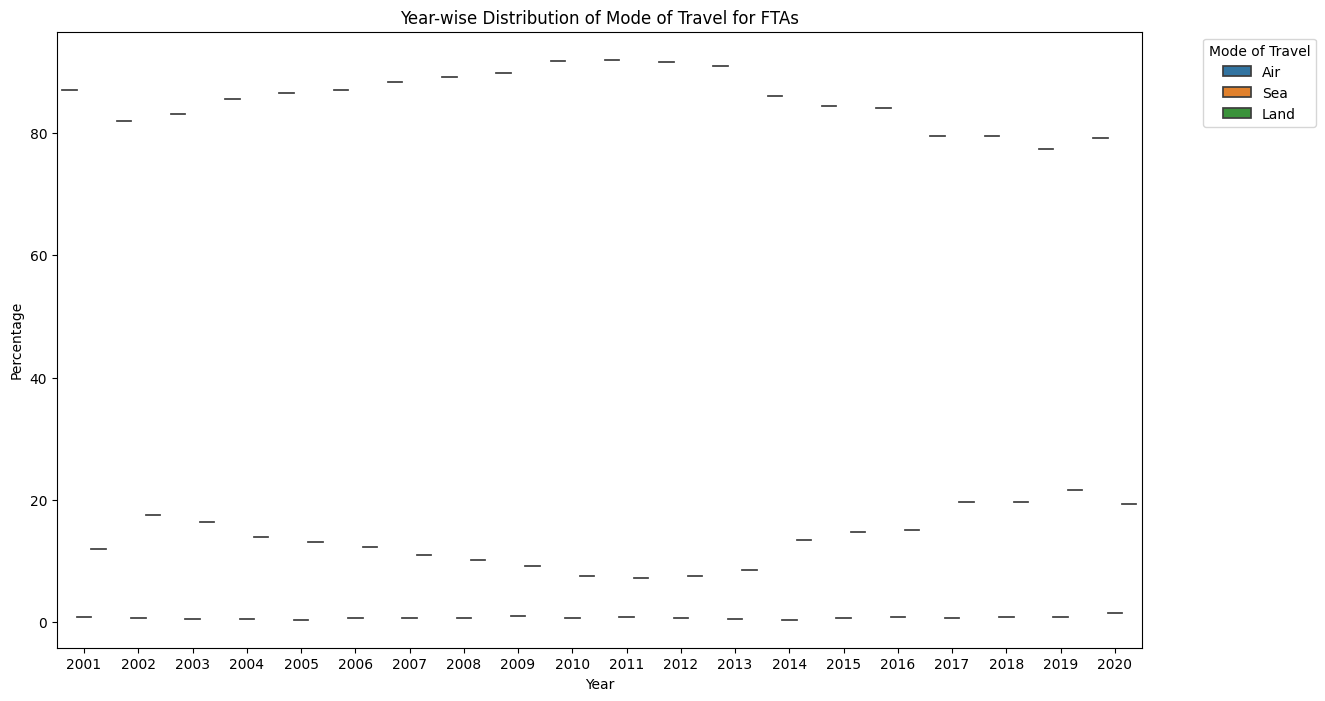

In [24]:
# Load the data
file_path_2021 = '/home/ykapil897/dv/lab_1/S2_T3_2_India-Tourism-Statistics-2021-Table-2.4.1.csv'
data_2021 = pd.read_csv(file_path_2021)

# Melt the data to have a long format for seaborn plot
melted_data_2021 = pd.melt(data_2021, id_vars=['Year'], value_vars=[
    '% distribution by mode of travel - Air',
    '% distribution by mode of travel - Sea',
    '% distribution by mode of travel - Land'
], var_name='Mode of Travel', value_name='Percentage')

# Rename the modes of travel for better readability
melted_data_2021['Mode of Travel'] = melted_data_2021['Mode of Travel'].replace({
    '% distribution by mode of travel - Air': 'Air',
    '% distribution by mode of travel - Sea': 'Sea',
    '% distribution by mode of travel - Land': 'Land'
})

# Plotting violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Year', y='Percentage', hue='Mode of Travel', data=melted_data_2021, split=True, inner="quart")
plt.title('Year-wise Distribution of Mode of Travel for FTAs')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Mode of Travel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

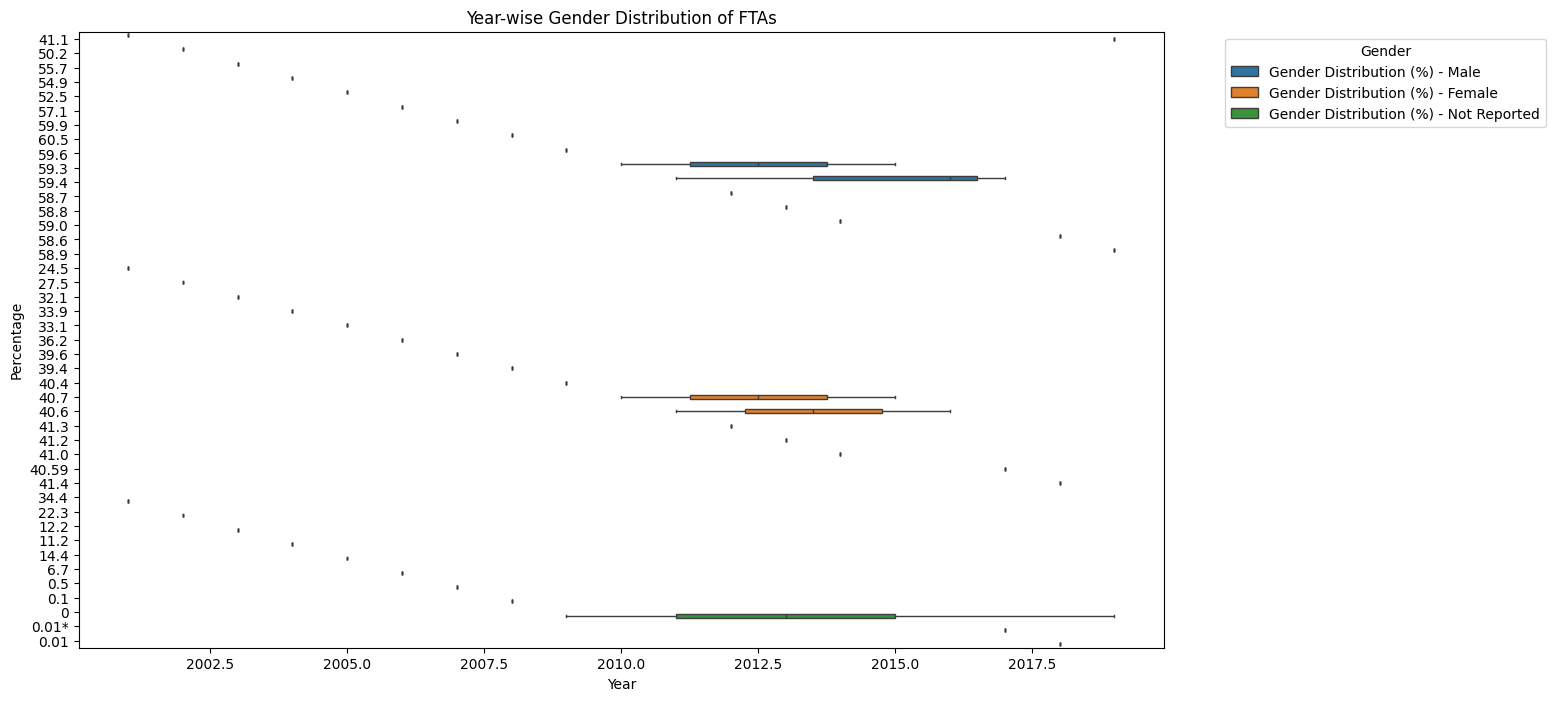

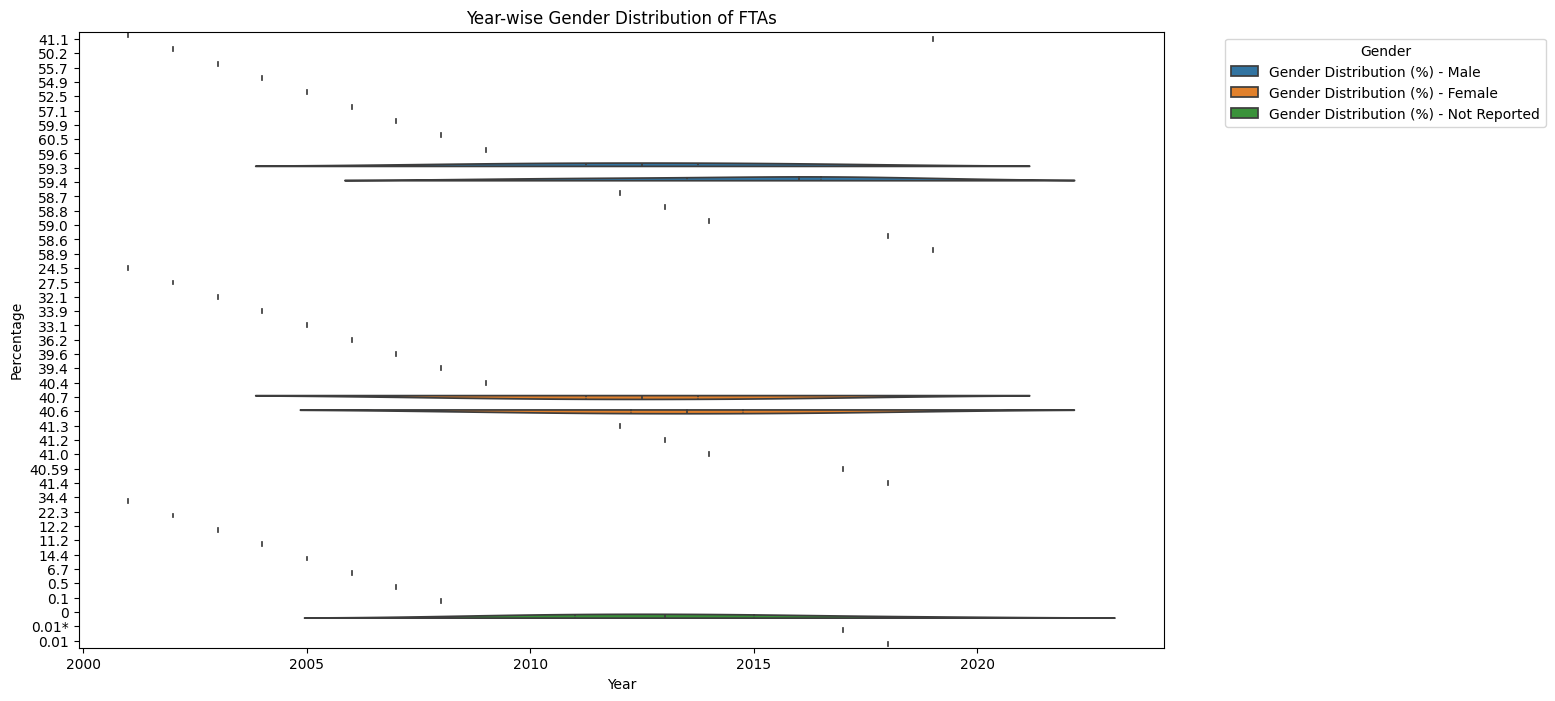

In [25]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/S2_T3_3_India-Tourism-Statistics-2020-TABLE-2.6.1.csv'
data = pd.read_csv(file_path)

# Melt the gender data to have a long format for seaborn plot
gender_groups = ['Gender Distribution (%) - Male', 'Gender Distribution (%) - Female', 'Gender Distribution (%) - Not Reported']
melted_gender_data = pd.melt(data, id_vars=['Year'], value_vars=gender_groups, 
                             var_name='Gender', value_name='Percentage')

# Plotting multiple box plots for gender distribution
plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='Percentage', hue='Gender', data=melted_gender_data)
plt.title('Year-wise Gender Distribution of FTAs')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting multiple violin plots for gender distribution
plt.figure(figsize=(14, 8))
sns.violinplot(x='Year', y='Percentage', hue='Gender', data=melted_gender_data, split=True, inner="quart")
plt.title('Year-wise Gender Distribution of FTAs')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [26]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/S2_T3_4_India-Tourism-Statistics-2019-Table-2.7.2.csv'
data = pd.read_csv(file_path)

# Filter data to include only rows where 'Country of Nationality' is 'Total'
filtered_data = data[data['Country of Nationality'] == 'Total']

# Define the age group columns
age_groups = ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65 and Above']

# Multiply each age group percentage by the corresponding number of arrivals
for age_group in age_groups:
    filtered_data[age_group] = filtered_data[age_group] * filtered_data['Arrivals (in Numbers)'] / 100

# Melt the data to have a long format for plotly treemap
melted_data = pd.melt(filtered_data, id_vars=['Category'], value_vars=age_groups, 
                      var_name='Age Group', value_name='Arrivals')

# Plotting Treemap
fig = px.treemap(melted_data, path=['Category', 'Age Group'], values='Arrivals',
                 color='Arrivals', hover_data=['Arrivals'],
                 color_continuous_scale='RdBu',
                 title='Nationality-wise Age Distribution of FTAs')

fig.show()

/tmp/ipykernel_6854/2657127626.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Story 03: Analysis of COVID-19 India

### Task 01 How did Maharashtra’s daily recoveries compare to the number of new infections during the peak and decline of the pandemic?

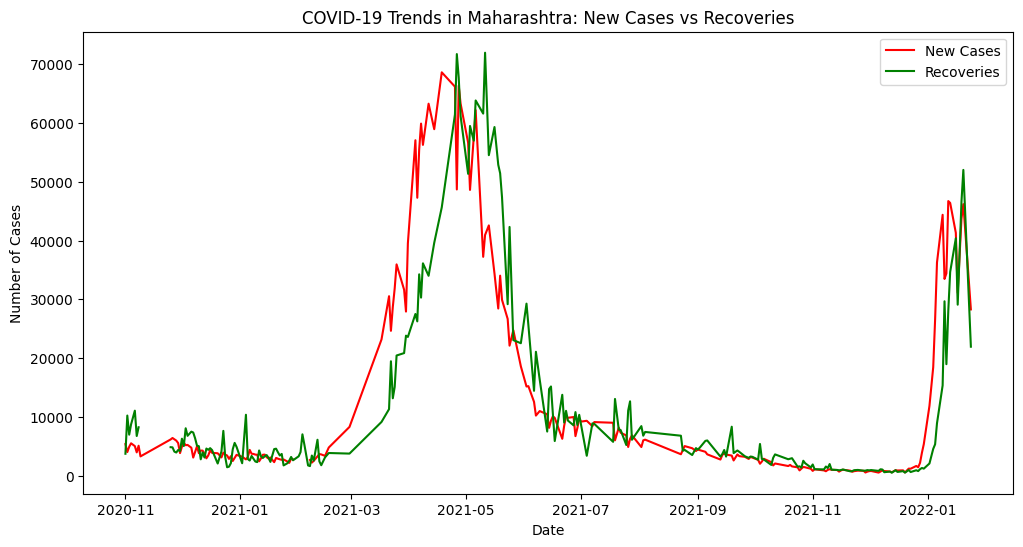

In [36]:
# Load data
file_path = 'S3_MH_case_info.csv'
covid_data = pd.read_csv(file_path)

# Convert 'date' column to datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(covid_data['date'], covid_data['cases_new'], color='red', label='New Cases')
plt.plot(covid_data['date'], covid_data['discharged_today'], color='green', label='Recoveries')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Trends in Maharashtra: New Cases vs Recoveries')
plt.legend()

# Display the plot
plt.show()


### Task 02 What proportion of patients were quarantined at home versus institutional facilities over time?

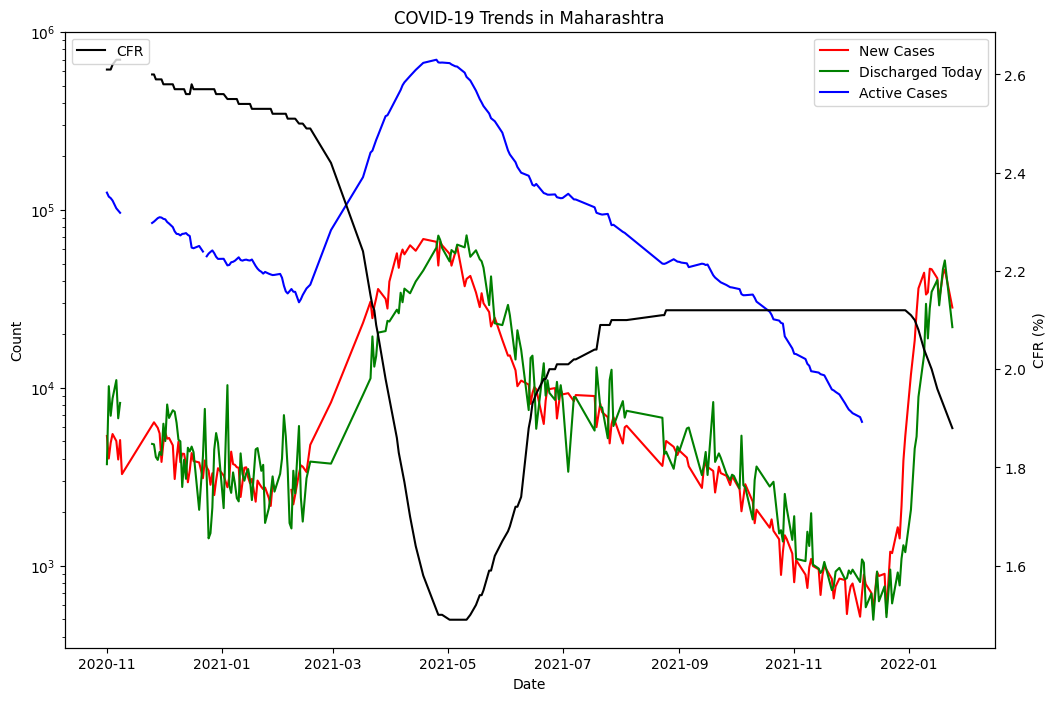

In [37]:
# Load the dataset
covid_stats = pd.read_csv(file_path)

# Convert 'date' column to datetime
covid_stats['date'] = pd.to_datetime(covid_stats['date'])

# Create a figure with dual y-axes
fig, primary_axis = plt.subplots(figsize=(12, 8))

# Plot new cases, discharged cases, and active cases
primary_axis.plot(covid_stats['date'], covid_stats['cases_new'], color='red', label='New Cases')
primary_axis.plot(covid_stats['date'], covid_stats['discharged_today'], color='green', label='Discharged Today')
primary_axis.plot(covid_stats['date'], covid_stats['active_cases'], color='blue', label='Active Cases')

# Set log scale for the primary y-axis
primary_axis.set_yscale('log')
primary_axis.set_xlabel('Date')
primary_axis.set_ylabel('Count')
primary_axis.legend(loc='upper right')

# Create a secondary y-axis for CFR
secondary_axis = primary_axis.twinx()
secondary_axis.plot(covid_stats['date'], covid_stats['cfr'], color='black', label='CFR')

secondary_axis.set_ylabel('CFR (%)')
secondary_axis.legend(loc='upper left')

# Add a title to the plot
plt.title('COVID-19 Trends in Maharashtra')

# Display the plot
plt.show()


### Task 03 How do new deaths relate to new infections over time?

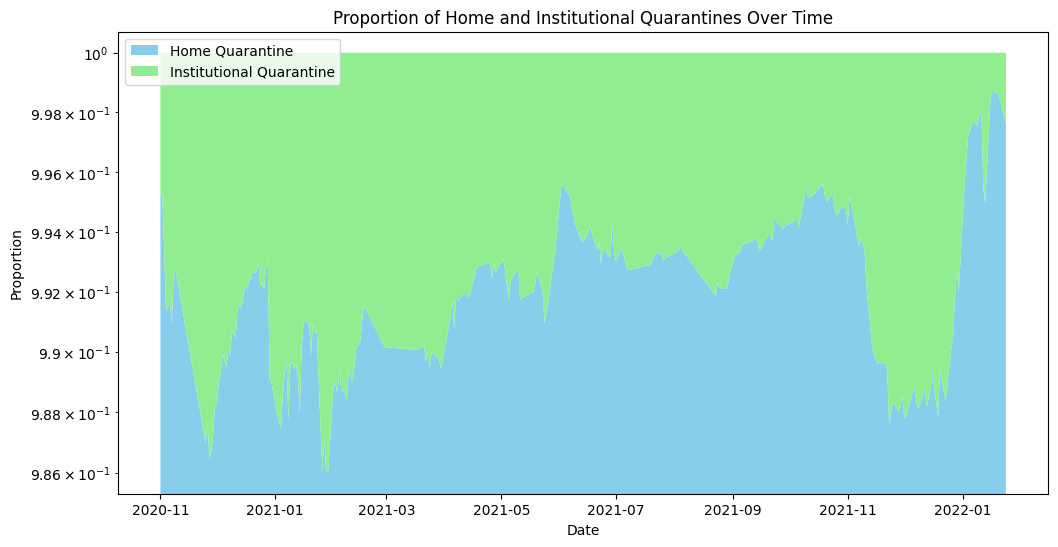

In [38]:
# Load the dataset
quarantine_data = pd.read_csv(file_path)

# Convert 'date' column to datetime format
quarantine_data['date'] = pd.to_datetime(quarantine_data['date'])

# Calculate total quarantines and proportions
quarantine_data['total_quarantine'] = (
    quarantine_data['current_home_quarantine'] + quarantine_data['current_institutional_quarantine']
)
quarantine_data['home_quarantine_share'] = (
    quarantine_data['current_home_quarantine'] / quarantine_data['total_quarantine']
)
quarantine_data['institutional_quarantine_share'] = (
    quarantine_data['current_institutional_quarantine'] / quarantine_data['total_quarantine']
)

# Plot the proportions using a stackplot
plt.figure(figsize=(12, 6))
plt.stackplot(
    quarantine_data['date'],
    quarantine_data['home_quarantine_share'],
    quarantine_data['institutional_quarantine_share'],
    labels=['Home Quarantine', 'Institutional Quarantine'],
    colors=['skyblue', 'lightgreen']
)

# Log scale for the y-axis
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.title('Proportion of Home and Institutional Quarantines Over Time')
plt.legend(loc='upper left')

# Display the plot
plt.show()


### Task 04 How do daily new cases correlate with deaths and recoveries during the pandemic?

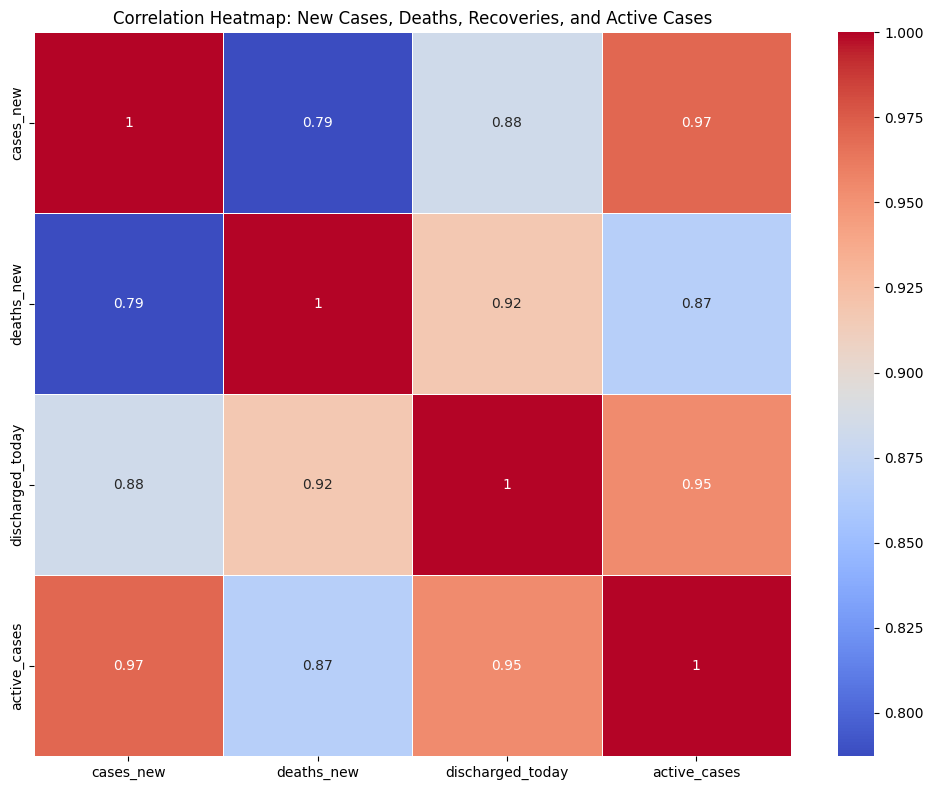

In [39]:
# Load the dataset
covid_data = pd.read_csv(file_path)

# Select columns of interest and handle missing values
features = ['cases_new', 'deaths_new', 'discharged_today', 'active_cases']
selected_data = covid_data[features].dropna()

# Calculate the correlation matrix
correlations = selected_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: New Cases, Deaths, Recoveries, and Active Cases')
plt.tight_layout()

# Display the plot
plt.show()


### Task 05 What is the density correlation between daily new cases and deaths during the pandemic?

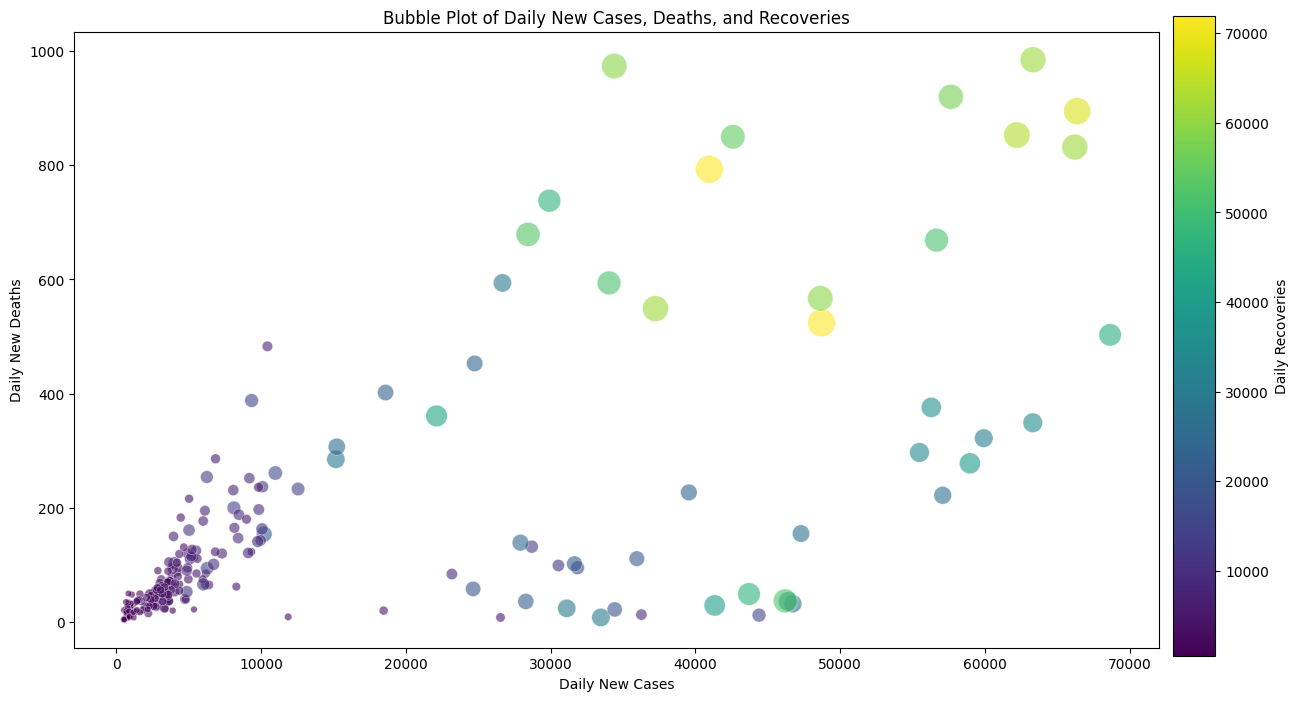

In [40]:
# Load the dataset
covid_data = pd.read_csv(file_path)

# Drop rows with missing values in the relevant columns
covid_data = covid_data.dropna(subset=['cases_new', 'deaths_new', 'discharged_today'])

# Create the bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='cases_new',
    y='deaths_new',
    size='discharged_today',
    hue='discharged_today',
    data=covid_data,
    palette='viridis',
    sizes=(20, 400),
    alpha=0.6,
    edgecolor='w',
    legend=None
)

# Add titles and labels
plt.title('Bubble Plot of Daily New Cases, Deaths, and Recoveries')
plt.xlabel('Daily New Cases')
plt.ylabel('Daily New Deaths')

# Add a colorbar for the 'discharged_today' variable
norm = plt.Normalize(covid_data['discharged_today'].min(), covid_data['discharged_today'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Daily Recoveries', cax=plt.axes([0.91, 0.1, 0.03, 0.8]))

# Display the plot
plt.show()


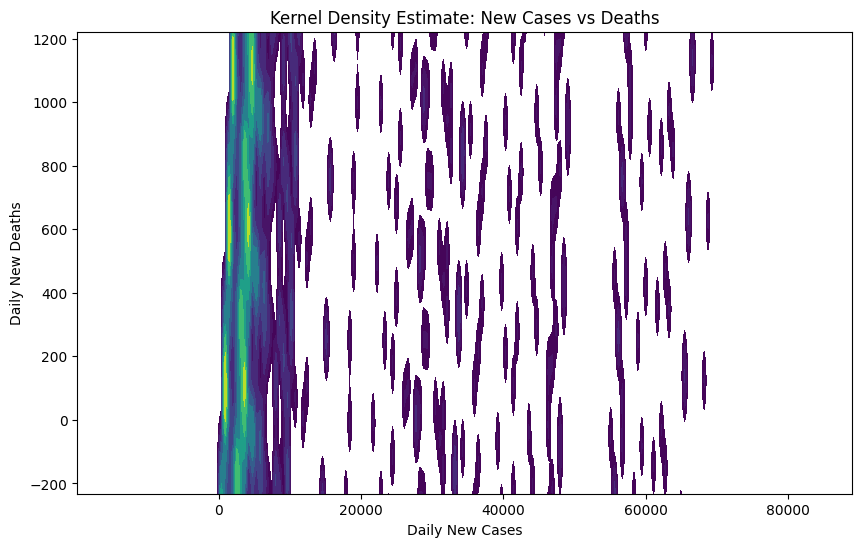

In [41]:
# Load the dataset
covid_data = pd.read_csv(file_path)

# Remove rows with missing values in 'cases_new' and 'deaths_new'
covid_data = covid_data.dropna(subset=['cases_new', 'deaths_new'])

# Plot the Kernel Density Estimate (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=covid_data,
    x='cases_new',
    y='deaths_new',
    fill=True,
    cmap="viridis"
)

# Add titles and labels
plt.title('Kernel Density Estimate: New Cases vs Deaths')
plt.xlabel('Daily New Cases')
plt.ylabel('Daily New Deaths')

# Display the plot
plt.show()


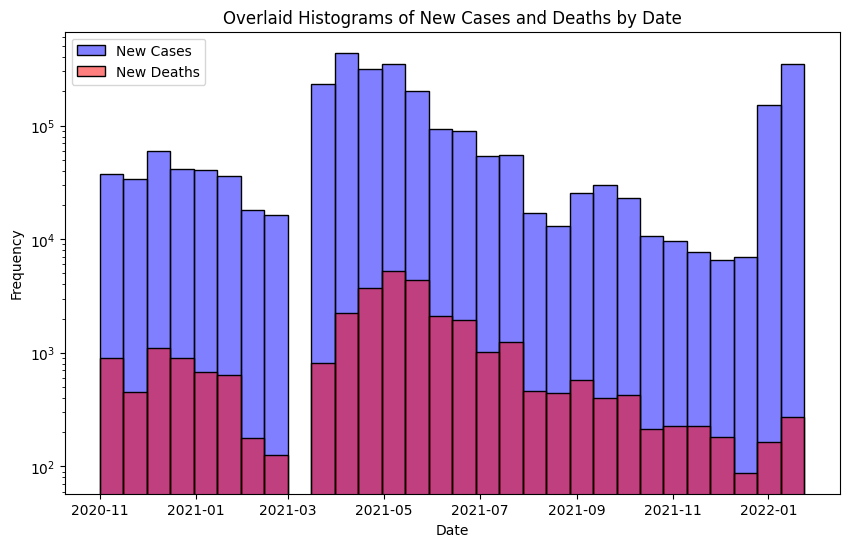

In [42]:
# Load the dataset
covid_data = pd.read_csv(file_path)

# Convert the 'date' column to datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Drop rows with missing values in 'cases_new' and 'deaths_new'
covid_data = covid_data.dropna(subset=['cases_new', 'deaths_new'])

# Aggregate data by date
daily_data = covid_data.groupby('date').sum().reset_index()

# Plot overlaid histograms for new cases and deaths
plt.figure(figsize=(10, 6))
sns.histplot(
    data=daily_data, 
    x='date', 
    weights='cases_new', 
    bins=30, 
    color='blue', 
    label='New Cases', 
    kde=False, 
    alpha=0.5
)
sns.histplot(
    data=daily_data, 
    x='date', 
    weights='deaths_new', 
    bins=30, 
    color='red', 
    label='New Deaths', 
    kde=False, 
    alpha=0.5
)

# Set logarithmic scale for y-axis
plt.yscale('log')

# Add title, labels, and legend
plt.title('Overlaid Histograms of New Cases and Deaths by Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()


# Story 4: IPL-Tracker
### Task 01: Match Outcomes by Team

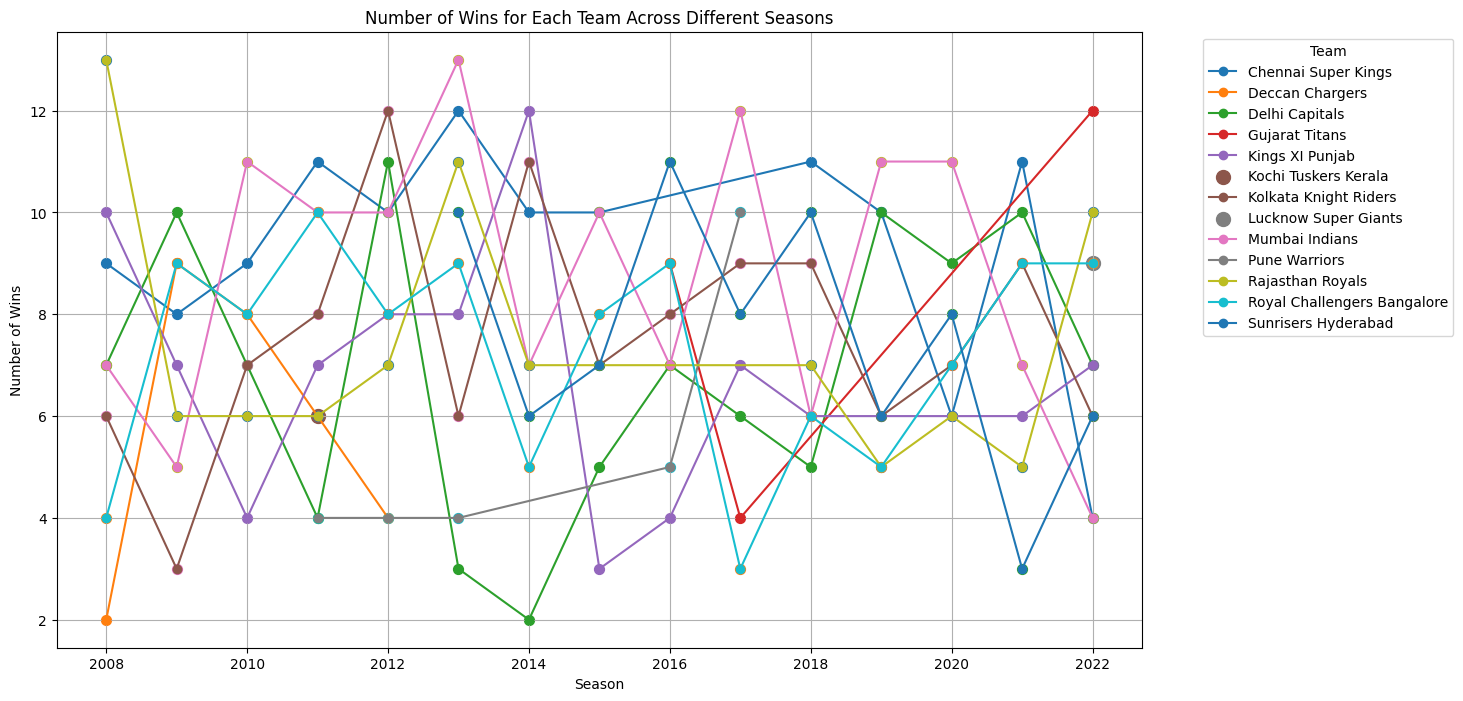

In [43]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/IPL_Matches_2008_2022.csv'
data = pd.read_csv(file_path)

# Consolidate team names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Punjab Kings': 'Kings XI Punjab'
}

data['WinningTeam'] = data['WinningTeam'].replace(team_name_mapping)

# Replace season names to ensure they are consecutive
season_mapping = {
    '2007/08': '2008',
    '2009/10': '2010',
    '2020/21': '2020'
}
data['Season'] = data['Season'].replace(season_mapping).astype(int)

# Filter out rows where WinningTeam is NaN
data = data.dropna(subset=['WinningTeam'])

# Group by Season and WinningTeam to count the number of wins for each team per season
wins_per_season = data.groupby(['Season', 'WinningTeam']).size().reset_index(name='Wins')

# Pivot the data to have teams as columns and seasons as rows
wins_pivot = wins_per_season.pivot(index='Season', columns='WinningTeam', values='Wins').fillna(pd.NA)

# Identify teams that played for only one season
one_season_teams = wins_pivot.columns[wins_pivot.apply(lambda x: x.sum() > 0, axis=0) & (wins_pivot.notna().sum(axis=0) == 1)]

# Plotting
plt.figure(figsize=(14, 8))
for team in wins_pivot.columns:
    team_data = wins_pivot[team].dropna()
    if team in one_season_teams:
        plt.scatter(team_data.index, team_data.values, s=100, label=team)  # Larger dots for one-season teams
    else:
        plt.plot(team_data.index, team_data.values, marker='o', label=team)
        plt.scatter(team_data.index, team_data.values, s=50)  # Smaller dots for multi-season teams

plt.title('Number of Wins for Each Team Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Task 02: Venue Analysis:

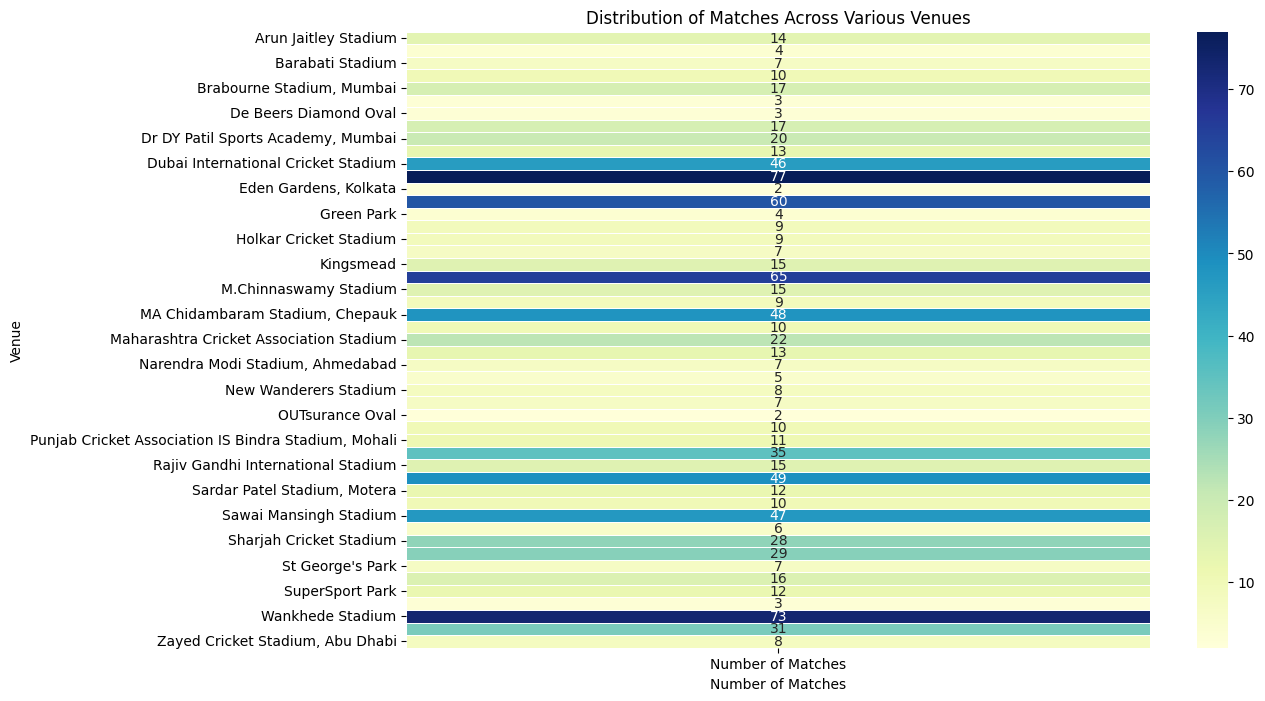

/tmp/ipykernel_6854/978009665.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




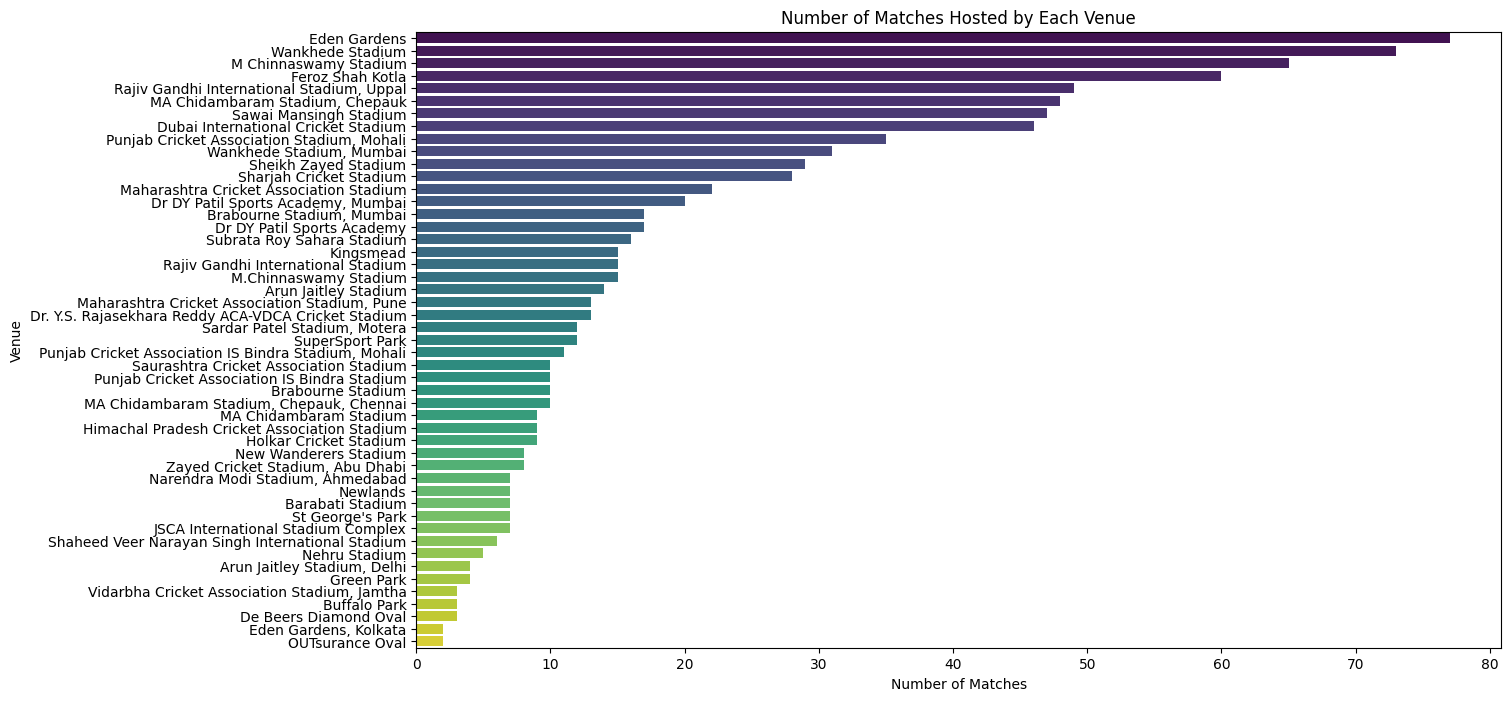

In [44]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/IPL_Matches_2008_2022.csv'
data = pd.read_csv(file_path)

# Group by Venue to count the number of matches hosted by each venue
venue_counts = data['Venue'].value_counts().reset_index()
venue_counts.columns = ['Venue', 'Number of Matches']

# Plotting heatmap
plt.figure(figsize=(12, 8))
heatmap_data = venue_counts.pivot_table(index='Venue', values='Number of Matches', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Distribution of Matches Across Various Venues')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

# Plotting bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Matches', y='Venue', data=venue_counts, palette='viridis')
plt.title('Number of Matches Hosted by Each Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

### Task 03: Toss Decisions Impact:

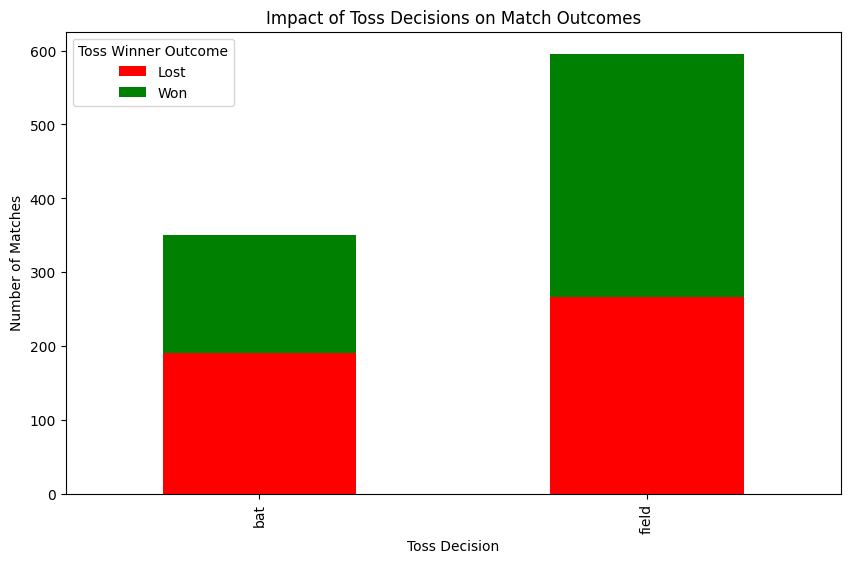

In [45]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/IPL_Matches_2008_2022.csv'
data = pd.read_csv(file_path)

# Filter out rows where WinningTeam is NaN
data = data.dropna(subset=['WinningTeam'])

# Create a new column to indicate if the toss winner won the match
data['TossWinnerWon'] = data['TossWinner'] == data['WinningTeam']

# Group by TossDecision and TossWinnerWon to count the number of matches
toss_impact = data.groupby(['TossDecision', 'TossWinnerWon']).size().reset_index(name='Count')

# Pivot the data to have TossDecision as columns and TossWinnerWon as rows
toss_pivot = toss_impact.pivot(index='TossDecision', columns='TossWinnerWon', values='Count').fillna(0)

# Plotting stacked bar chart
toss_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Impact of Toss Decisions on Match Outcomes')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.legend(['Lost', 'Won'], title='Toss Winner Outcome')
plt.show()

### Task 04: Player Performance:

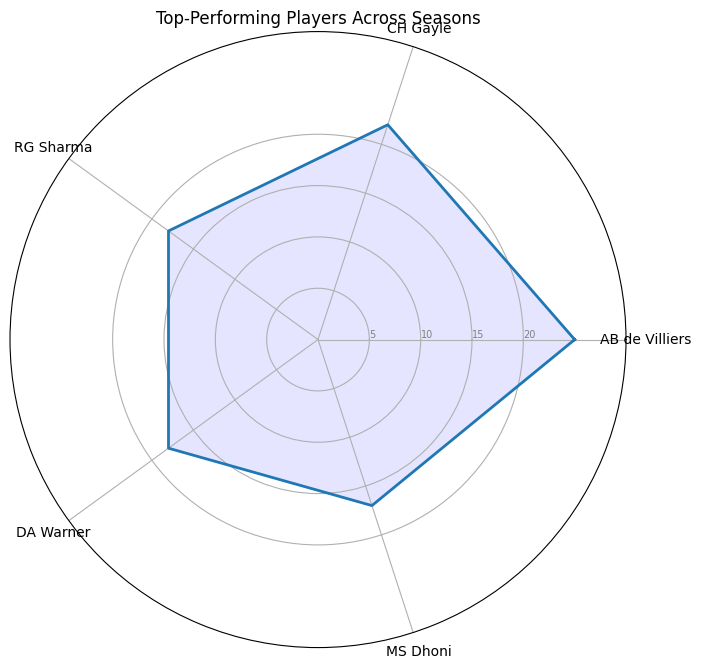

In [46]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/IPL_Matches_2008_2022.csv'
data = pd.read_csv(file_path)

# Count the number of "Player of the Match" awards for each player
player_awards = data['Player_of_Match'].value_counts().reset_index()
player_awards.columns = ['Player', 'Awards']

# Select the top 5 players with the most "Player of the Match" awards
top_players = player_awards.head(5)

# Prepare data for radar chart
categories = top_players['Player'].tolist()
values = top_players['Awards'].tolist()

# Number of variables
num_vars = len(categories)

# Compute angle of each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Initialize radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories)

# Draw y-labels
ax.set_rlabel_position(0)
plt.yticks([5, 10, 15, 20], ["5", "10", "15", "20"], color="grey", size=7)
plt.ylim(0, max(values) + 5)

# Plot data
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Top-Performing Players Across Seasons')
plt.show()

/tmp/ipykernel_6854/2844235425.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




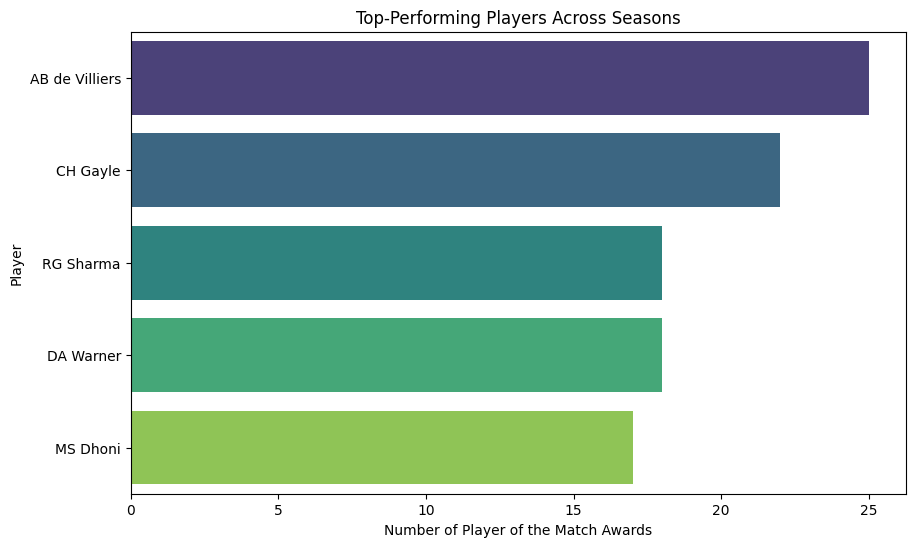

In [47]:
# Plotting bar chart for top-performing players
plt.figure(figsize=(10, 6))
sns.barplot(x='Awards', y='Player', data=top_players, palette='viridis')
plt.title('Top-Performing Players Across Seasons')
plt.xlabel('Number of Player of the Match Awards')
plt.ylabel('Player')
plt.show()

### Task 05: Head-to-Head Team Analysis:

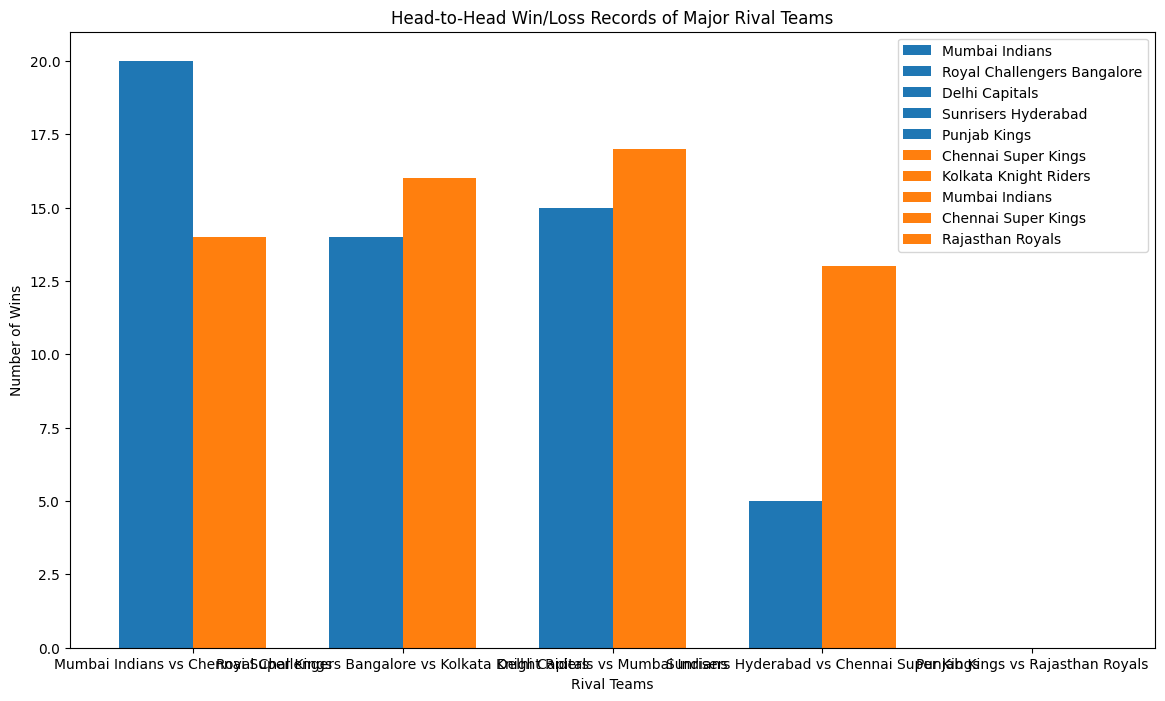

In [48]:
# Load the data
file_path = '/home/ykapil897/dv/lab_1/IPL_Matches_2008_2022.csv'
data = pd.read_csv(file_path)

# Consolidate team names
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Punjab Kings': 'Kings XI Punjab'
}

data['Team1'] = data['Team1'].replace(team_name_mapping)
data['Team2'] = data['Team2'].replace(team_name_mapping)
data['WinningTeam'] = data['WinningTeam'].replace(team_name_mapping)

# Define major rival teams
major_rival_teams = [
    ('Mumbai Indians', 'Chennai Super Kings'),
    ('Royal Challengers Bangalore', 'Kolkata Knight Riders'),
    ('Delhi Capitals', 'Mumbai Indians'),
    ('Sunrisers Hyderabad', 'Chennai Super Kings'),
    ('Punjab Kings', 'Rajasthan Royals')
]

# Initialize an empty list to store head-to-head records
head_to_head_records = []

# Calculate head-to-head records for each pair of rival teams
for team1, team2 in major_rival_teams:
    wins_team1 = data[(data['Team1'] == team1) & (data['Team2'] == team2) & (data['WinningTeam'] == team1)].shape[0] + \
                 data[(data['Team1'] == team2) & (data['Team2'] == team1) & (data['WinningTeam'] == team1)].shape[0]
    wins_team2 = data[(data['Team1'] == team1) & (data['Team2'] == team2) & (data['WinningTeam'] == team2)].shape[0] + \
                 data[(data['Team1'] == team2) & (data['Team2'] == team1) & (data['WinningTeam'] == team2)].shape[0]
    head_to_head_records.append({'Team1': team1, 'Team2': team2, 'Wins_Team1': wins_team1, 'Wins_Team2': wins_team2})

# Convert the list to a DataFrame
head_to_head_records_df = pd.DataFrame(head_to_head_records)

# Plotting grouped bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(head_to_head_records_df))

plt.bar(index, head_to_head_records_df['Wins_Team1'], bar_width, label=head_to_head_records_df['Team1'])
plt.bar([i + bar_width for i in index], head_to_head_records_df['Wins_Team2'], bar_width, label=head_to_head_records_df['Team2'])

plt.xlabel('Rival Teams')
plt.ylabel('Number of Wins')
plt.title('Head-to-Head Win/Loss Records of Major Rival Teams')
plt.xticks([i + bar_width / 2 for i in index], [f"{row['Team1']} vs {row['Team2']}" for _, row in head_to_head_records_df.iterrows()])
plt.legend()
plt.show()